# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [16]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Importing python file HouseholdSpecializationModel
import HouseholdSpecializationModel as HSM
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt # baseline module

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [17]:

model = HSM.HouseholdSpecializationModelClass()
# Printing results when sigma=1

# code
x = [0.25,0.5,0.75]
z = [0.5,1,1.5]

for i in range(3):
    for j in range(3):
        model.par.alpha = x[i]
        model.par.sigma =z[j]
        results = model.solve_discrete()
        
        print(results.HF/results.HM)

/Users/oliver/Desktop/Introduction to Programming and Numerical Analysis/lectures_and_exercises/projects-2023-politgrammering/inauguralproject/HouseholdSpecializationModel.py:60: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
/Users/oliver/Desktop/Introduction to Programming and Numerical Analysis/lectures_and_exercises/projects-2023-politgrammering/inauguralproject/HouseholdSpecializationModel.py:60: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
/Users/oliver/Desktop/Introduction to Programming and Numerical Analysis/lectures_and_exercises/projects-2023-politgrammering/inauguralproject/HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)

0.5454545454545454
0.3076923076923077
0.21428571428571427
1.0
1.0
1.0
1.8333333333333333
3.25
4.666666666666667


# Question 2

Explain your code and procedure

0.22314355131420976
0.0
0.0
-0.11778303565638351
-0.2231435513142097
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


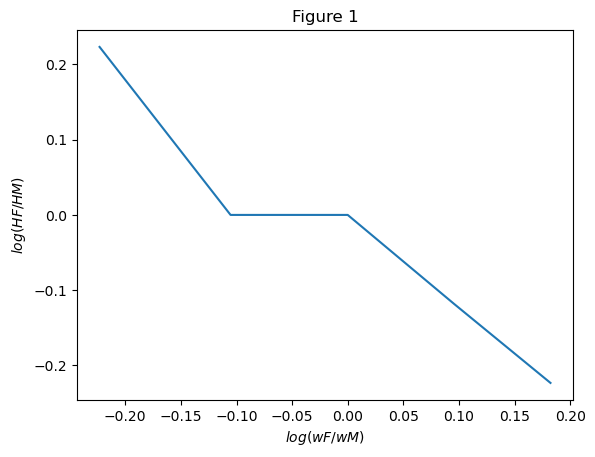

In [18]:
model.par.alpha=0.5
model.par.sigma=1

for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_discrete()
        
        print(np.log(results.HF/results.HM))

log_WF_WM=np.log(model.par.wF_vec)
print(log_WF_WM)

fig = plt.figure()


# b. plot
ax = fig.add_subplot(1,1,1)


ax.plot(log_WF_WM,[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097])


ax.set_title('Figure 1')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');


# Question 3

Explain your code and procedure

In [19]:
# code
model.solve()
for i in range(5):
        res = model.solve()

print_solution(x1,x2,u,I,p1,p2)


#Det har noget med det her at gøre
 #missing line, hint: res = optimize.minimize(?,?,method='SLSQP',bounds=bounds,constraints=constraints)
#se A7.py 
#se videoen til optimize minimize

# a. contraint function (negative if violated)



#løs optimizer i py filen

AttributeError: 'HouseholdSpecializationModelClass' object has no attribute 'solve'

ADD CONCISE CONLUSION.

In [36]:
#Question 4
reg= HSM.HouseholdSpecializationModelClass().run_regression()
print(reg.x)


/Users/oliver/Desktop/Introduction to Programming and Numerical Analysis/lectures_and_exercises/projects-2023-politgrammering/inauguralproject/HouseholdSpecializationModel.py:126: RuntimeWarning: invalid value encountered in true_divide
  y = np.log(sol.HF_vec/sol.HM_vec)


AttributeError: 'NoneType' object has no attribute 'x'

In [ ]:
def solve(self,do_print=False):
        """ solve model continously """
       
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        
        # a. all possible choices
        x = np.linspace(0,24,49)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        constraints = ({'type': 'ineq', 'fun': lambda LM, HM: 24- LM-HM, lambda LF, HF: 24- LF-HF })
        bounds = ((0,24))

        # b. call optimizer
        initial_guess = (4/4)/6 # some guess, should be feasible
        res = optimize.minimize(
            lambda x: -utility_function(x,alpha),initial_guess,
            method='SLSQP',bounds=bounds,constraints=constraints)

        print(res.message) # check that the solver has terminated correctly

        # c. print result
        print_solution(res.x,alpha,I,p)
    
    pass